In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [41]:
df=pd.read_csv("Adani_Stock.csv")
df

Date    Price     Open     High      Low   Volume  Change
0     07 Sep 2023  2509.50  2498.00  2520.00  2485.00  4298988   0.52%
1     06 Sep 2023  2496.50  2494.05  2504.00  2471.00  7416248   0.10%
2     05 Sep 2023  2494.05  2482.00  2501.40  2464.00  6489319   0.95%
3     04 Sep 2023  2470.60  2454.00  2480.00  2450.05  5998454   0.84%
4     01 Sep 2023  2450.05  2381.00  2465.55  2380.00  6764397   1.27%
...           ...      ...      ...      ...      ...      ...     ...
4965  15 Sep 2003     6.41     6.67     6.67     6.32    33956  -2.44%
4966  12 Sep 2003     6.57     6.66     6.72     6.50    37512   0.61%
4967  11 Sep 2003     6.53     6.56     6.75     6.47    38052  -0.76%
4968  10 Sep 2003     6.58     6.53     6.68     6.50    36487  -0.15%
4969  09 Sep 2003     6.59     6.75     6.87     6.47    41136  -0.45%

[4970 rows x 7 columns]

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4970 non-null   object 
 1   Price   4970 non-null   float64
 2   Open    4970 non-null   float64
 3   High    4970 non-null   float64
 4   Low     4970 non-null   float64
 5   Volume  4970 non-null   int64  
 6   Change  4970 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 271.9+ KB


In [43]:
df.describe()

Price         Open         High          Low        Volume
count  4970.000000  4970.000000  4970.000000  4970.000000  4.970000e+03
mean    410.787964   411.281626   419.467525   402.242932  2.901142e+06
std     731.959845   733.276373   745.323869   718.693768  5.032982e+06
min       6.060000     5.940000     6.160000     5.940000  9.060000e+02
25%      60.827500    61.200000    62.395000    59.757500  3.693175e+05
50%     147.745000   147.975000   151.380000   144.050000  1.439226e+06
75%     310.540000   311.290000   316.787500   305.980000  3.532316e+06
max    4165.300000  4175.000000  4190.000000  4066.400000  9.271507e+07

In [44]:
df.isnull().sum()

Date      0
Price     0
Open      0
High      0
Low       0
Volume    0
Change    0
dtype: int64

In [45]:
df['Date']

0       07 Sep 2023
1       06 Sep 2023
2       05 Sep 2023
3       04 Sep 2023
4       01 Sep 2023
           ...     
4965    15 Sep 2003
4966    12 Sep 2003
4967    11 Sep 2003
4968    10 Sep 2003
4969    09 Sep 2003
Name: Date, Length: 4970, dtype: object

In [46]:
df['Days']= df['Date'].str.split(" ",expand=True)[0]
df['Months']= df['Date'].str.split(" ",expand=True)[1]
df['Years']= df['Date'].str.split(" ",expand=True)[2]

In [47]:
df

Date    Price     Open     High      Low   Volume  Change Days  \
0     07 Sep 2023  2509.50  2498.00  2520.00  2485.00  4298988   0.52%   07   
1     06 Sep 2023  2496.50  2494.05  2504.00  2471.00  7416248   0.10%   06   
2     05 Sep 2023  2494.05  2482.00  2501.40  2464.00  6489319   0.95%   05   
3     04 Sep 2023  2470.60  2454.00  2480.00  2450.05  5998454   0.84%   04   
4     01 Sep 2023  2450.05  2381.00  2465.55  2380.00  6764397   1.27%   01   
...           ...      ...      ...      ...      ...      ...     ...  ...   
4965  15 Sep 2003     6.41     6.67     6.67     6.32    33956  -2.44%   15   
4966  12 Sep 2003     6.57     6.66     6.72     6.50    37512   0.61%   12   
4967  11 Sep 2003     6.53     6.56     6.75     6.47    38052  -0.76%   11   
4968  10 Sep 2003     6.58     6.53     6.68     6.50    36487  -0.15%   10   
4969  09 Sep 2003     6.59     6.75     6.87     6.47    41136  -0.45%   09   

     Months Years  
0       Sep  2023  
1       Sep  2023  
2       Sep  2023  
3       Sep  2023  
4       Sep  2023  
...     ...   ...  
4965    Sep  2003  
4966    Sep  2003  
4967    Sep  2003  
4968    Sep  2003  
4969    Sep  2003  

[4970 rows x 10 columns]

In [48]:
df['Days']=df['Days'].astype(int)
df['Years']=df['Years'].astype(int)

In [49]:
df['Months'].unique()

array(['Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan',
       'Dec', 'Nov', 'Oct'], dtype=object)

In [50]:
months={'Sep':9, 'Aug':8, 'Jul':7, 'Jun':6, 'May':5, 'Apr':4, 'Mar':3, 'Feb':2, 'Jan':1,'Dec':12, 'Nov':11, 'Oct':10}
df['Months']=df['Months'].map(months)

In [51]:
df.rename(columns={'Price':'Close'},inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4970 entries, 0 to 4969
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    4970 non-null   object 
 1   Close   4970 non-null   float64
 2   Open    4970 non-null   float64
 3   High    4970 non-null   float64
 4   Low     4970 non-null   float64
 5   Volume  4970 non-null   int64  
 6   Change  4970 non-null   object 
 7   Days    4970 non-null   int32  
 8   Months  4970 non-null   int64  
 9   Years   4970 non-null   int32  
dtypes: float64(4), int32(2), int64(2), object(2)
memory usage: 349.6+ KB


### We dont need change column as it changes with respect to time regularly, hence we have to drop change column.
### Now, we dont need Date column as we have days,months,years columns. So we have to drop date column also.

In [53]:
df.drop(columns=['Date','Change'],axis=1,inplace=True)

In [54]:
df

Close     Open     High      Low   Volume  Days  Months  Years
0     2509.50  2498.00  2520.00  2485.00  4298988     7       9   2023
1     2496.50  2494.05  2504.00  2471.00  7416248     6       9   2023
2     2494.05  2482.00  2501.40  2464.00  6489319     5       9   2023
3     2470.60  2454.00  2480.00  2450.05  5998454     4       9   2023
4     2450.05  2381.00  2465.55  2380.00  6764397     1       9   2023
...       ...      ...      ...      ...      ...   ...     ...    ...
4965     6.41     6.67     6.67     6.32    33956    15       9   2003
4966     6.57     6.66     6.72     6.50    37512    12       9   2003
4967     6.53     6.56     6.75     6.47    38052    11       9   2003
4968     6.58     6.53     6.68     6.50    36487    10       9   2003
4969     6.59     6.75     6.87     6.47    41136     9       9   2003

[4970 rows x 8 columns]

<AxesSubplot:>

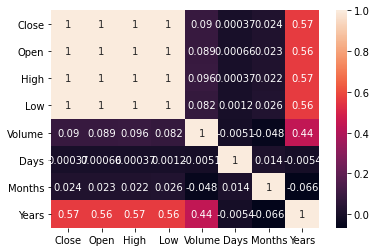

In [55]:
sns.heatmap(df.corr(),annot=True)

In [56]:
X=df.drop(columns=['Open','Days','Months','Years'])
y=df['Open']

In [57]:
X

Close     High      Low   Volume
0     2509.50  2520.00  2485.00  4298988
1     2496.50  2504.00  2471.00  7416248
2     2494.05  2501.40  2464.00  6489319
3     2470.60  2480.00  2450.05  5998454
4     2450.05  2465.55  2380.00  6764397
...       ...      ...      ...      ...
4965     6.41     6.67     6.32    33956
4966     6.57     6.72     6.50    37512
4967     6.53     6.75     6.47    38052
4968     6.58     6.68     6.50    36487
4969     6.59     6.87     6.47    41136

[4970 rows x 4 columns]

In [58]:
y

0       2498.00
1       2494.05
2       2482.00
3       2454.00
4       2381.00
         ...   
4965       6.67
4966       6.66
4967       6.56
4968       6.53
4969       6.75
Name: Open, Length: 4970, dtype: float64

<AxesSubplot:>

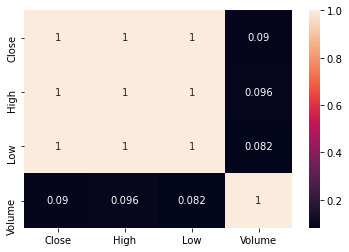

In [59]:
sns.heatmap(X.corr(),annot=True)

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=142)

In [62]:
print(X_train.shape,X_test.shape)

(3976, 4) (994, 4)


In [63]:
print(y_train.shape,y_test.shape)

(3976,) (994,)


In [65]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [66]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [143]:
#pip install xgboost

Note: you may need to restart the kernel to use updated packages.


# Model Building

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error as MSE, r2_score, accuracy_score

## Linear Regression

In [68]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [71]:
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)

In [72]:
print("Train Data")
print("RMSE:",np.sqrt(MSE(y_train,y_train_pred)))
print("R2 Score:",r2_score(y_train,y_train_pred))

Train Data
RMSE: 9.585510111728398
R2 Score: 0.9998310546989144


In [73]:
print("Test Data")
print("RMSE:",np.sqrt(MSE(y_test,y_test_pred)))
print("R2 Score:",r2_score(y_test,y_test_pred))

Test Data
RMSE: 28.92565724341108
R2 Score: 0.9983670629332524


In [80]:
lr.predict(sc.transform([[2509.50,2520,2485,4298988]])) # 2498

array([2576.67938786])

In [81]:
lr.intercept_

413.71507796780685

In [82]:
lr.coef_

array([-6.20381054e+02,  7.56811017e+02,  6.01059925e+02, -5.54896293e-01])

## Lasso & Ridge

In [93]:
from sklearn.linear_model import Ridge, Lasso

In [269]:
l1=Lasso(alpha=28)
l1.fit(X_train,y_train)

Lasso(alpha=28)

In [270]:
y_train_pred=l1.predict(X_train)
y_test_pred=l1.predict(X_test)

In [271]:
print("Train Data")
print("RMSE:",np.sqrt(MSE(y_train,y_train_pred)))
print("R2 Score:",r2_score(y_train,y_train_pred))

Train Data
RMSE: 33.72061800936286
R2 Score: 0.9979092278387786


In [272]:
print("Test Data")
print("RMSE:",np.sqrt(MSE(y_test,y_test_pred)))
print("R2 Score:",r2_score(y_test,y_test_pred))

Test Data
RMSE: 31.571825746247402
R2 Score: 0.9980546293009604


In [273]:
l1.predict(sc.transform([[2509.50,2520,2485,4298988]])) # 2498

array([2497.02183187])

In [237]:
# Ridge

In [248]:
r1=Ridge(alpha=50)
r1.fit(X_train,y_train)

Ridge(alpha=50)

In [249]:
y_train_pred=r1.predict(X_train)
y_test_pred=r1.predict(X_test)

In [250]:
print("Train Data")
print("RMSE:",np.sqrt(MSE(y_train,y_train_pred)))
print("R2 Score:",r2_score(y_train,y_train_pred))

Train Data
RMSE: 17.192266178136627
R2 Score: 0.9994565220722857


In [251]:
print("Test Data")
print("RMSE:",np.sqrt(MSE(y_test,y_test_pred)))
print("R2 Score:",r2_score(y_test,y_test_pred))

Test Data
RMSE: 37.8210729227679
R2 Score: 0.9972082876626703


In [252]:
r1.predict(sc.transform([[2509.50,2520,2485,4298988]])) # 2498

array([2584.09486714])

## Random Forest Regressor

In [124]:
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [125]:
y_train_pred=rfr.predict(X_train)
y_test_pred=rfr.predict(X_test)

In [126]:
print("Train Data")
print("RMSE:",np.sqrt(MSE(y_train,y_train_pred)))
print("R2 Score:",r2_score(y_train,y_train_pred))

Train Data
RMSE: 6.359209900909323
R2 Score: 0.9999256429796831


In [127]:
print("Test Data")
print("RMSE:",np.sqrt(MSE(y_test,y_test_pred)))
print("R2 Score:",r2_score(y_test,y_test_pred))

Test Data
RMSE: 33.85095616320536
R2 Score: 0.9977636238255946


In [253]:
rfr.predict(sc.transform([[2509.50,2520,2485,4298988]])) # 2498

array([2575.3725])

## Decision Tree Regressor

In [128]:
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [129]:
y_train_pred=dtr.predict(X_train)
y_test_pred=dtr.predict(X_test)

In [130]:
print("Train Data")
print("RMSE:",np.sqrt(MSE(y_train,y_train_pred)))
print("R2 Score:",r2_score(y_train,y_train_pred))

Train Data
RMSE: 4.0236677146324213e-16
R2 Score: 1.0


In [131]:
print("Test Data")
print("RMSE:",np.sqrt(MSE(y_test,y_test_pred)))
print("R2 Score:",r2_score(y_test,y_test_pred))

Test Data
RMSE: 29.637470086000793
R2 Score: 0.9982857062835739


In [254]:
dtr.predict(sc.transform([[2509.50,2520,2485,4298988]])) # 2498

array([2580.])

## XGBoost

In [145]:
xgb=XGBRegressor()
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [146]:
y_train_pred=xgb.predict(X_train)
y_test_pred=xgb.predict(X_test)

In [147]:
print("Train Data")
print("RMSE:",np.sqrt(MSE(y_train,y_train_pred)))
print("R2 Score:",r2_score(y_train,y_train_pred))

Train Data
RMSE: 2.6402191915539213
R2 Score: 0.999987182727284


In [148]:
print("Test Data")
print("RMSE:",np.sqrt(MSE(y_test,y_test_pred)))
print("R2 Score:",r2_score(y_test,y_test_pred))

Test Data
RMSE: 35.61325714209068
R2 Score: 0.9975247084059663


In [255]:
xgb.predict(sc.transform([[2509.50,2520,2485,4298988]])) # 2498

array([2559.7834], dtype=float32)

## As we can see L1 means Lasso Regresson model is predicting better than others.

In [275]:
import pickle

In [278]:
file=open("model.pkl","wb")
pickle.dump(l1,file)